In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("global_tech_salary.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,MI,FT,Data Analyst,165000,USD,165000,AU,0,AU,M
1,2023,MI,FT,Data Analyst,70000,USD,70000,US,100,US,M
2,2024,MI,FT,Machine Learning Engineer,85000,EUR,94444,IE,100,IE,M
3,2024,SE,FT,Data Scientist,92700,USD,92700,US,0,US,M
4,2023,MI,FT,Research Engineer,150000,USD,150000,US,0,US,M


In [3]:
df.dropna(inplace=True)

In [4]:
df["company_location"].value_counts()

company_location
US    4402
GB     202
CA     115
ES      52
DE      34
FR      20
AU      16
IN      16
PT      12
NL      11
BR       9
IE       7
MX       6
PL       6
CO       5
LT       5
ZA       5
IT       5
EG       4
NG       4
SI       4
EE       4
AE       3
AR       3
VN       3
TR       3
MT       2
TH       2
LV       2
GH       2
BE       2
LU       2
DK       2
UA       2
AT       2
CH       2
GR       2
JP       2
PH       2
CF       2
SG       2
AS       1
PK       1
KR       1
IL       1
HN       1
RO       1
FI       1
EC       1
SE       1
MY       1
NZ       1
RU       1
AM       1
IQ       1
Name: count, dtype: int64

C:\Users\DE88\AppData\Local\Temp\ipykernel_28168\3723305647.py:4: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  values[6] = np.sum(values[6:])


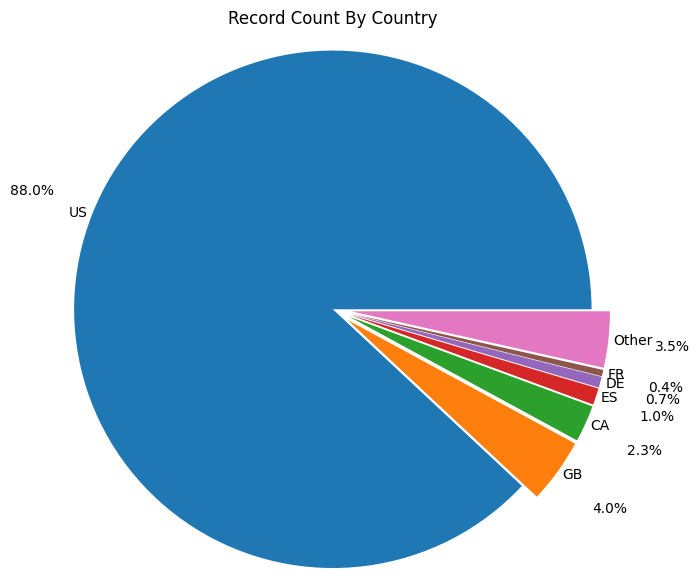

In [5]:
values = df["company_location"].value_counts()
labels = values.index.to_numpy().copy()

values[6] = np.sum(values[6:])
values = values[:7]

labels = labels[:7]
labels[6] = "Other"

explode = np.ones_like(labels)/8
explode[0] = 0

plt.pie(values, explode, labels=labels, labeldistance=1.02, autopct="%1.1f%%", pctdistance=1.25, radius=1.75,)
plt.title("Record Count By Country", y=1.25)
plt.show()

In [6]:
countries = df["company_location"].value_counts()[df["company_location"].value_counts() < 20].index
countries

Index(['AU', 'IN', 'PT', 'NL', 'BR', 'IE', 'MX', 'PL', 'CO', 'LT', 'ZA', 'IT',
       'EG', 'NG', 'SI', 'EE', 'AE', 'AR', 'VN', 'TR', 'MT', 'TH', 'LV', 'GH',
       'BE', 'LU', 'DK', 'UA', 'AT', 'CH', 'GR', 'JP', 'PH', 'CF', 'SG', 'AS',
       'PK', 'KR', 'IL', 'HN', 'RO', 'FI', 'EC', 'SE', 'MY', 'NZ', 'RU', 'AM',
       'IQ'],
      dtype='object', name='company_location')

In [7]:
new_df = df.copy()
new_df.loc[new_df["company_location"].isin(countries), "company_location"] = "Other"
new_df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,MI,FT,Data Analyst,165000,USD,165000,AU,0,Other,M
1,2023,MI,FT,Data Analyst,70000,USD,70000,US,100,US,M
2,2024,MI,FT,Machine Learning Engineer,85000,EUR,94444,IE,100,Other,M
3,2024,SE,FT,Data Scientist,92700,USD,92700,US,0,US,M
4,2023,MI,FT,Research Engineer,150000,USD,150000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
4995,2023,SE,FT,Machine Learning Infrastructure Engineer,70000,EUR,75577,FR,100,FR,M
4996,2022,SE,FT,Data Engineer,145000,USD,145000,US,0,US,M
4997,2024,SE,FT,Machine Learning Engineer,153000,USD,153000,US,0,US,M
4998,2022,EN,FT,AI Scientist,30000,EUR,31520,PT,100,ES,M


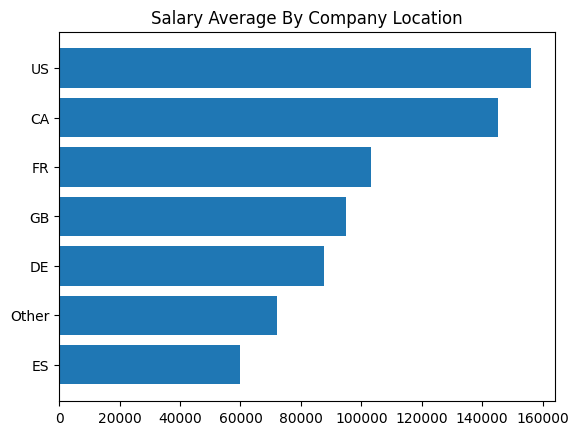

In [8]:
%matplotlib inline
values = new_df.groupby("company_location")["salary_in_usd"].mean().sort_values()
# values = new_df.loc[new_df["company_location"].isin(countries)].groupby("company_location")["salary_in_usd"].mean().sort_values()
labels = values.index
plt.barh(y=labels, width=values)
plt.title("Salary Average By Company Location")
plt.show()

In [9]:
df["job_title"].unique()

array(['Data Analyst', 'Machine Learning Engineer', 'Data Scientist',
       'Research Engineer', 'Data Engineer',
       'Machine Learning Infrastructure Engineer', 'Analytics Engineer',
       'AI Research Engineer', 'Research Scientist', 'BI Analyst',
       'ML Engineer', 'Business Intelligence Analyst', 'AI Engineer',
       'Research Analyst', 'Staff Data Analyst',
       'Data Infrastructure Engineer', 'Data Operations Specialist',
       'Machine Learning Scientist', 'Applied Scientist', 'BI Developer',
       'Machine Learning Researcher', 'Data Science',
       'Data Science Manager', 'Data Specialist', 'NLP Engineer',
       'Business Intelligence Engineer', 'Data Architect',
       'Data Science Practitioner', 'Computer Vision Engineer',
       'Data Science Lead', 'Insight Analyst', 'Data Manager',
       'Decision Scientist', 'Data Strategist',
       'Data Integration Specialist', 'Data Product Manager',
       'Head of Data', 'Lead Data Analyst', 'Data Operations Associ

In [10]:
titles = df["job_title"].value_counts()[df["job_title"].value_counts() < 30].index
titles

Index(['Data Science Consultant', 'BI Developer', 'Business Intelligence',
       'Head of Data', 'Data Specialist', 'Business Intelligence Developer',
       'Data Analytics Manager', 'Machine Learning Infrastructure Engineer',
       'Computer Vision Engineer', 'BI Analyst',
       ...
       'Sales Data Analyst', 'Autonomous Vehicle Technician',
       'BI Data Engineer', 'AWS Data Architect', 'Data Analyst Lead',
       'Data Quality Engineer', 'Principal Data Analyst',
       'Data Integration Developer', 'Lead Data Analyst', 'Data Modeller'],
      dtype='object', name='job_title', length=105)

In [11]:
new_df = df.copy()
new_df.loc[new_df["job_title"].isin(titles), "job_title"] = "Other"
new_df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,MI,FT,Data Analyst,165000,USD,165000,AU,0,AU,M
1,2023,MI,FT,Data Analyst,70000,USD,70000,US,100,US,M
2,2024,MI,FT,Machine Learning Engineer,85000,EUR,94444,IE,100,IE,M
3,2024,SE,FT,Data Scientist,92700,USD,92700,US,0,US,M
4,2023,MI,FT,Research Engineer,150000,USD,150000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
4995,2023,SE,FT,Other,70000,EUR,75577,FR,100,FR,M
4996,2022,SE,FT,Data Engineer,145000,USD,145000,US,0,US,M
4997,2024,SE,FT,Machine Learning Engineer,153000,USD,153000,US,0,US,M
4998,2022,EN,FT,Other,30000,EUR,31520,PT,100,ES,M


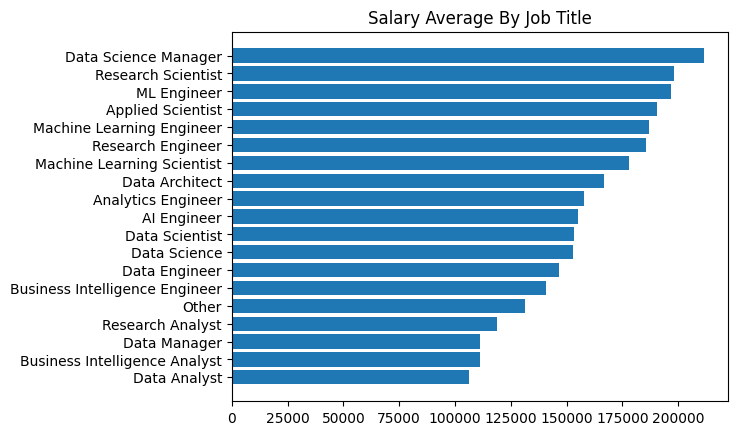

In [12]:
%matplotlib inline
values = new_df.groupby("job_title")["salary_in_usd"].mean().sort_values()
# values = new_df.loc[new_df["job_title"].isin(titles)].groupby("job_title")["salary_in_usd"].mean().sort_values()
labels = values.index
plt.barh(y=labels, width=values)
plt.title("Salary Average By Job Title")
# plt.xscale("log")
plt.show()

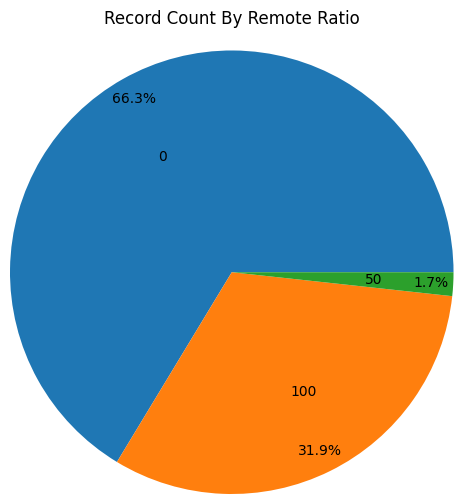

In [13]:
values = df["remote_ratio"].value_counts()
labels = values.index.to_numpy().copy()

plt.pie(values, labels=labels, labeldistance=0.6, autopct="%1.1f%%", pctdistance=0.9, radius=1.5)
plt.title("Record Count By Remote Ratio", y=1.15)
plt.show()

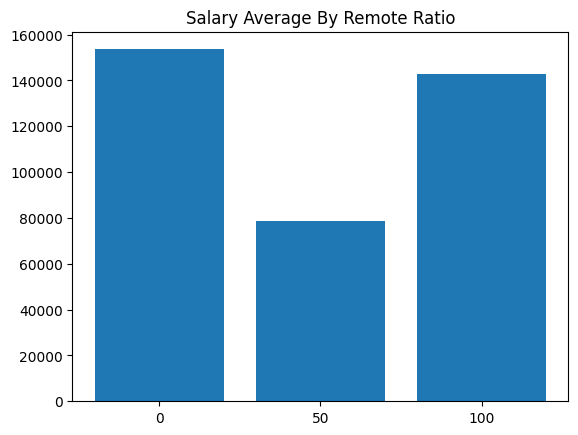

In [14]:
values = df.groupby("remote_ratio")["salary_in_usd"].mean()
labels = values.index.astype(str)
plt.bar(x=labels, height=values)
plt.title("Salary Average By Remote Ratio")
plt.show()

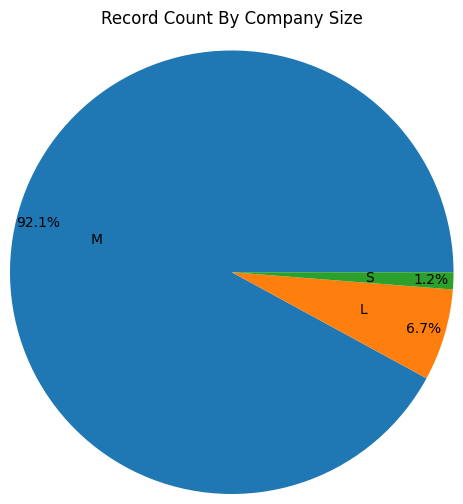

In [15]:
values = df["company_size"].value_counts()
labels = values.index.to_numpy().copy()

plt.pie(values, labels=labels, labeldistance=0.6, autopct="%1.1f%%", pctdistance=0.9, radius=1.5)
plt.title("Record Count By Company Size", y=1.15)
plt.show()

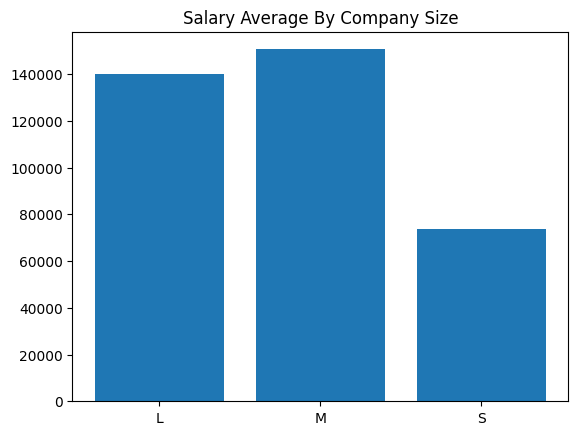

In [16]:
values = df.groupby("company_size")["salary_in_usd"].mean()
labels = values.index.astype(str)
plt.bar(x=labels, height=values)
plt.title("Salary Average By Company Size")
plt.show()

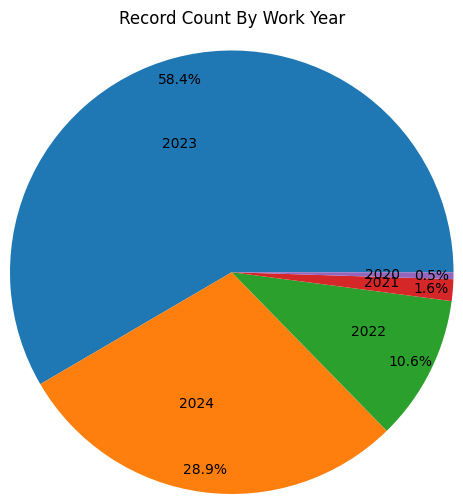

In [17]:
values = df["work_year"].value_counts()
labels = values.index.to_numpy().copy()

plt.pie(values, labels=labels, labeldistance=0.6, autopct="%1.1f%%", pctdistance=0.9, radius=1.5)
plt.title("Record Count By Work Year", y=1.15)
plt.show()

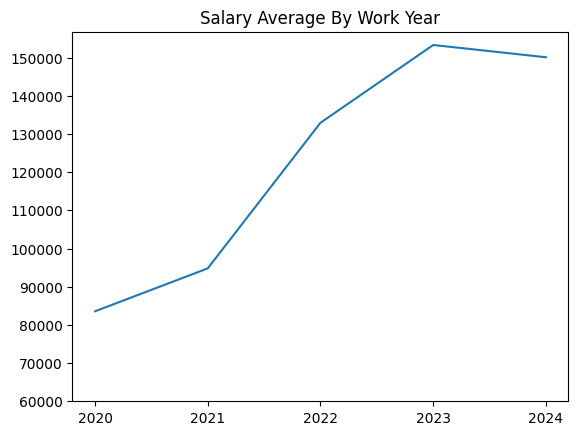

In [19]:
values = df.groupby("work_year")["salary_in_usd"].mean()
values_min = df.groupby("work_year")["salary_in_usd"].min()
values_max = df.groupby("work_year")["salary_in_usd"].max()
labels = values.index.astype(str)
# plt.fill_between(labels, values_max, values_min, alpha=.5)
plt.plot(labels, values)
plt.title("Salary Average By Work Year")
plt.yticks(np.arange(60000, 160000, 10000))
plt.show()

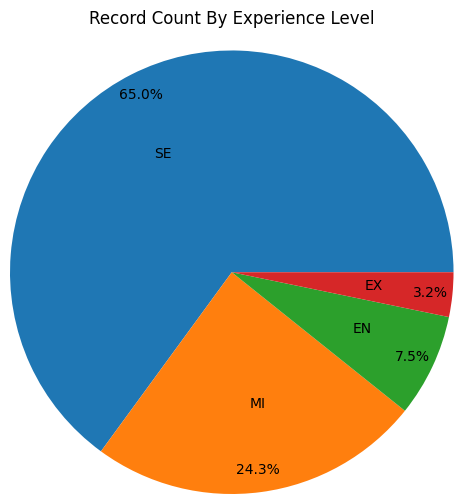

In [18]:
values = df["experience_level"].value_counts()
labels = values.index.to_numpy().copy()

plt.pie(values, labels=labels, labeldistance=0.6, autopct="%1.1f%%", pctdistance=0.9, radius=1.5)
plt.title("Record Count By Experience Level", y=1.15)
plt.show()

In [20]:
df.groupby("experience_level")["salary_in_usd"].mean().reindex(["EN", "MI", "SE", "EX"], )

experience_level
EN     90930.128000
MI    124433.395885
SE    162814.877771
EX    188359.438272
Name: salary_in_usd, dtype: float64

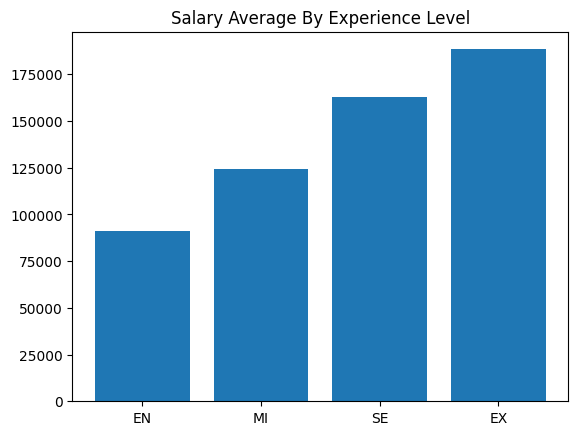

In [21]:
values = df.groupby("experience_level")["salary_in_usd"].mean().reindex(["EN", "MI", "SE", "EX"])
labels = values.index.astype(str)
plt.bar(x=labels, height=values)
plt.title("Salary Average By Experience Level")
plt.show()

In [22]:
exsize_df = df.loc[:,("experience_level","company_size")].groupby("company_size").value_counts(sort=False)
exsize_df

company_size  experience_level
L             EN                    40
              EX                     7
              MI                    99
              SE                   189
M             EN                   316
              EX                   153
              MI                  1091
              SE                  3043
S             EN                    19
              EX                     2
              MI                    25
              SE                    16
Name: count, dtype: int64

Text(0.5, 1.0, 'Seniority Based On Company Size')

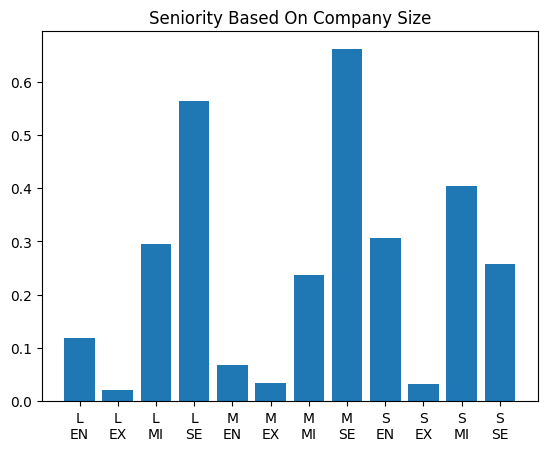

In [23]:
exsize = exsize_df.to_numpy().astype(np.float_)
exsize[:4] = exsize[:4]/np.sum(exsize[:4])
exsize[4:8] = exsize[4:8]/np.sum(exsize[4:8])
exsize[8:] = exsize[8:]/np.sum(exsize[8:])
exsize
plt.bar(['L\nEN','L\nEX','L\nMI','L\nSE','M\nEN','M\nEX','M\nMI','M\nSE','S\nEN','S\nEX','S\nMI','S\nSE'], exsize,)
plt.title("Seniority Based On Company Size")